In [1]:
from keras.models import Sequential, Model
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten, Input, merge, Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.utils.visualize_util import model_to_dot, plot
import numpy as np
from IPython.display import SVG

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
np.random.seed(13)

Using Theano backend.


In [2]:
batch_size = 256
nb_classes = 10
nb_epoch = 20
nb_filter = 10

img_rows, img_cols = 32, 32
img_channels = 3

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


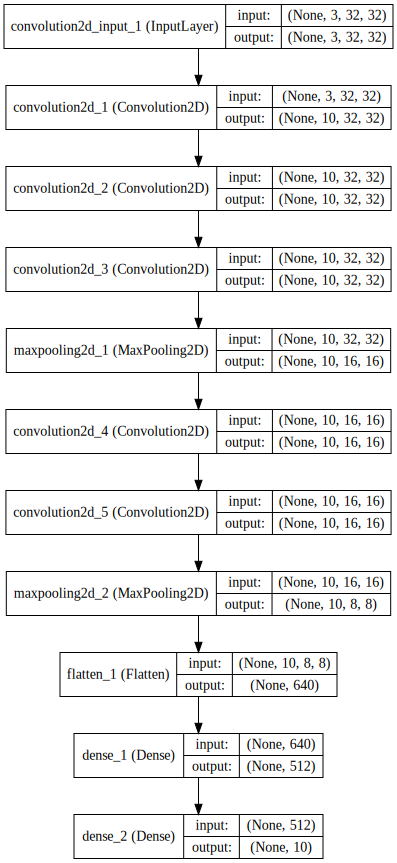

In [3]:
model = Sequential()
model.add(Convolution2D(nb_filter, 3, 3, input_shape=(img_channels, img_rows, img_cols), border_mode="same", activation="relu"))
model.add(Convolution2D(nb_filter, 3, 3, border_mode="same", activation="relu"))
model.add(Convolution2D(nb_filter, 3, 3, border_mode="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(nb_filter, 3, 3, border_mode="same", activation="relu"))
model.add(Convolution2D(nb_filter, 3, 3, border_mode="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(nb_classes, activation="softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

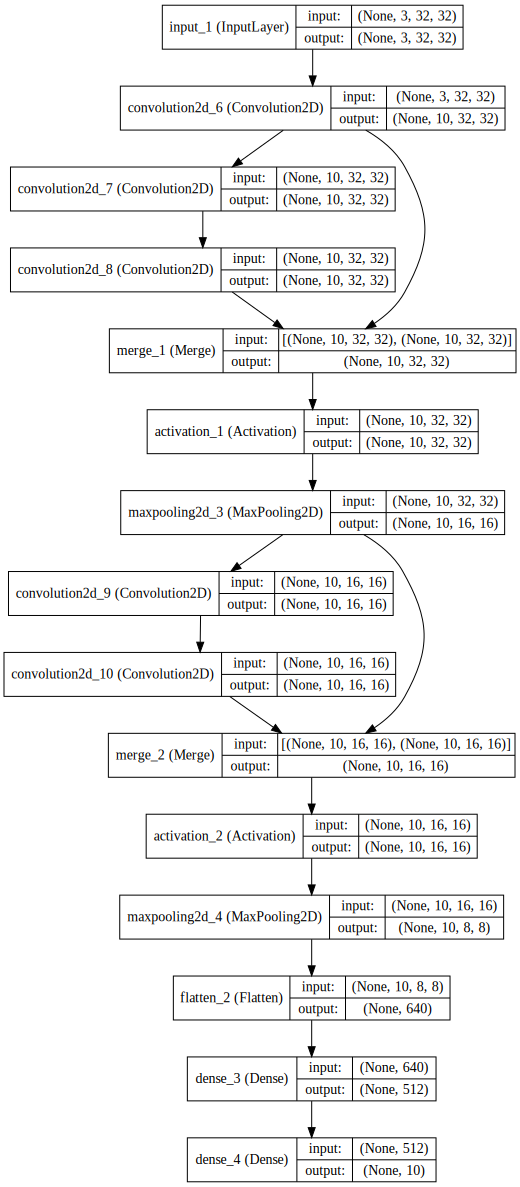

In [4]:
in_img = Input(shape=(img_channels, img_rows, img_cols))
x = Convolution2D(nb_filter, 3, 3, border_mode="same", activation="relu")(in_img)
for _ in range(2):
    y = Convolution2D(nb_filter, 3, 3, border_mode="same", activation="relu")(x)
    y = Convolution2D(nb_filter, 3, 3, border_mode="same")(y)
    x = merge([x, y], mode="sum")
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dense(nb_classes, activation="softmax")(x)


residual = Model(input=in_img, output=x)

residual.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

SVG(model_to_dot(residual, show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
cnn = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 6s - loss: 1.9700 - acc: 0.2956 - val_loss: 1.8894 - val_acc: 0.3011
Epoch 2/20
50000/50000 [==============================] - 6s - loss: 1.5663 - acc: 0.4408 - val_loss: 1.4413 - val_acc: 0.4778
Epoch 3/20
50000/50000 [==============================] - 6s - loss: 1.3498 - acc: 0.5181 - val_loss: 1.3117 - val_acc: 0.5307
Epoch 4/20
50000/50000 [==============================] - 6s - loss: 1.1882 - acc: 0.5787 - val_loss: 1.5642 - val_acc: 0.4462
Epoch 5/20
50000/50000 [==============================] - 6s - loss: 1.0748 - acc: 0.6248 - val_loss: 1.1815 - val_acc: 0.5963
Epoch 6/20
50000/50000 [==============================] - 6s - loss: 0.9711 - acc: 0.6597 - val_loss: 1.2062 - val_acc: 0.5857
Epoch 7/20
50000/50000 [==============================] - 6s - loss: 0.8747 - acc: 0.6933 - val_loss: 1.1563 - val_acc: 0.6054
Epoch 8/20
50000/50000 [==============================] - 6s 

In [ ]:
resi = residual.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 6s - loss: 1.9815 - acc: 0.3124 - val_loss: 1.6688 - val_acc: 0.4223
Epoch 2/20
50000/50000 [==============================] - 6s - loss: 1.4312 - acc: 0.4943 - val_loss: 1.6099 - val_acc: 0.4463
Epoch 3/20
50000/50000 [==============================] - 6s - loss: 1.2106 - acc: 0.5747 - val_loss: 1.2428 - val_acc: 0.5683
Epoch 4/20
50000/50000 [==============================] - 6s - loss: 1.0569 - acc: 0.6313 - val_loss: 1.2517 - val_acc: 0.5729
Epoch 5/20
50000/50000 [==============================] - 6s - loss: 0.9351 - acc: 0.6731 - val_loss: 1.1756 - val_acc: 0.5904
Epoch 6/20
50000/50000 [==============================] - 6s - loss: 0.8356 - acc: 0.7124 - val_loss: 1.2673 - val_acc: 0.5862
Epoch 7/20
50000/50000 [==============================] - 6s - loss: 0.7249 - acc: 0.7475 - val_loss: 1.3000 - val_acc: 0.5748
Epoch 8/20
50000/50000 [==============================] - 6s 

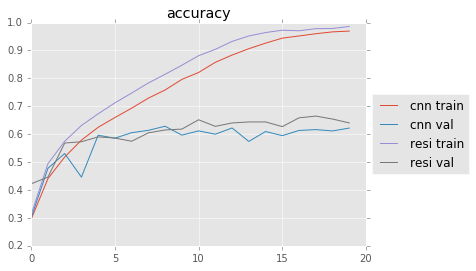

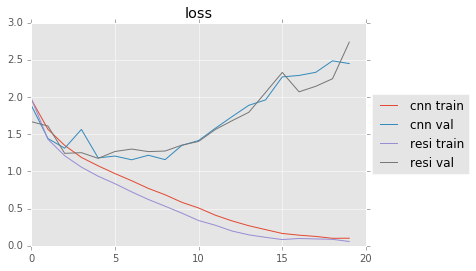

In [ ]:
x = range(nb_epoch)
plt.plot(x, cnn.history['acc'], label="cnn train")
plt.plot(x, cnn.history['val_acc'], label="cnn val")
plt.plot(x, resi.history['acc'], label="resi train")
plt.plot(x, resi.history['val_acc'], label="resi val")
plt.title("accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, cnn.history['loss'], label="cnn train")
plt.plot(x, cnn.history['val_loss'], label="cnn val")
plt.plot(x, resi.history['loss'], label="resi train")
plt.plot(x, resi.history['val_loss'], label="resi val")
plt.title("loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()